# Relatório de Análise VII

## Criando Agrupamentos

In [28]:
import pandas as pd

In [29]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

In [30]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
5,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
6,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
7,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0,17.59,Apartamento
8,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,25.37,Apartamento
9,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,17.27,Apartamento


In [31]:
dados['Valor'].mean()

5240.800573796621

In [32]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [33]:
dados['Bairro'].drop_duplicates()

0          Copacabana
8     Barra da Tijuca
9              Tijuca
10            Ipanema
15             Leblon
33           Botafogo
55           Flamengo
Name: Bairro, dtype: object

In [34]:
grupo_bairro = dados.groupby('Bairro')

In [35]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [36]:
grupo_bairro.groups

{'Barra da Tijuca': [8, 12, 18, 20, 21, 28, 41, 42, 45, 48, 51, 56, 66, 76, 78, 80, 85, 99, 102, 110, 112, 113, 119, 120, 126, 135, 137, 151, 162, 165, 173, 190, 192, 200, 209, 210, 215, 220, 223, 235, 241, 242, 250, 259, 264, 267, 273, 279, 289, 298, 314, 315, 316, 317, 319, 327, 328, 337, 339, 345, 346, 353, 361, 367, 370, 378, 399, 400, 401, 402, 405, 409, 411, 412, 413, 434, 437, 438, 440, 444, 445, 449, 456, 471, 472, 475, 488, 489, 495, 496, 504, 509, 518, 521, 522, 524, 530, 534, 536, 539, ...], 'Botafogo': [33, 61, 62, 79, 87, 95, 101, 142, 146, 240, 261, 301, 302, 365, 389, 390, 404, 443, 485, 511, 565, 572, 616, 621, 684, 691, 695, 752, 777, 804, 819, 822, 829, 840, 859, 888, 892, 906, 929, 953, 963, 1026, 1050, 1054, 1079, 1138, 1178, 1212, 1228, 1240, 1264, 1356, 1359, 1378, 1425, 1432, 1451, 1462, 1467, 1475, 1503, 1534, 1536, 1542, 1543, 1544, 1553, 1590, 1591, 1615, 1627, 1663, 1700, 1738, 1757, 1766, 1777, 1791, 1793, 1822, 1854, 1864, 1875, 1913, 1967, 2037, 2045, 2073

In [37]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca -> 7218.256578947368
Botafogo -> 3735.0679190751443
Copacabana -> 4283.542502387774
Flamengo -> 4133.692857142857
Ipanema -> 9166.298568507158
Leblon -> 8647.735408560311
Tijuca -> 2039.3006711409396


In [38]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7218.26,4111.04
Botafogo,3735.07,1020.39
Copacabana,4283.54,1187.74
Flamengo,4133.69,1111.78
Ipanema,9166.30,2226.34
Leblon,8647.74,2126.39
Tijuca,2039.30,721.77


## Estatísticas Descritivas

In [39]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3040.0,7218.26,12853.61,850.0,2600.0,4600.0,9000.0,600000.0
Botafogo,692.0,3735.07,2728.84,700.0,2287.5,3200.0,4412.5,25000.0
Copacabana,2094.0,4283.54,3746.95,700.0,2000.0,3000.0,5000.0,35000.0
Flamengo,560.0,4133.69,3786.80,800.0,2000.0,2990.0,5000.0,35000.0
Ipanema,1467.0,9166.30,8036.35,1200.0,4500.0,6900.0,10500.0,90000.0
Leblon,1028.0,8647.74,6304.48,1500.0,4500.0,7000.0,10500.0,55000.0
Tijuca,745.0,2039.30,1772.71,750.0,1500.0,1800.0,2300.0,45000.0


In [40]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min':'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,850.0,600000.0
Botafogo,700.0,25000.0
Copacabana,700.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,1500.0,55000.0
Tijuca,750.0,45000.0


In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Valor médio do aluguel por bairro')

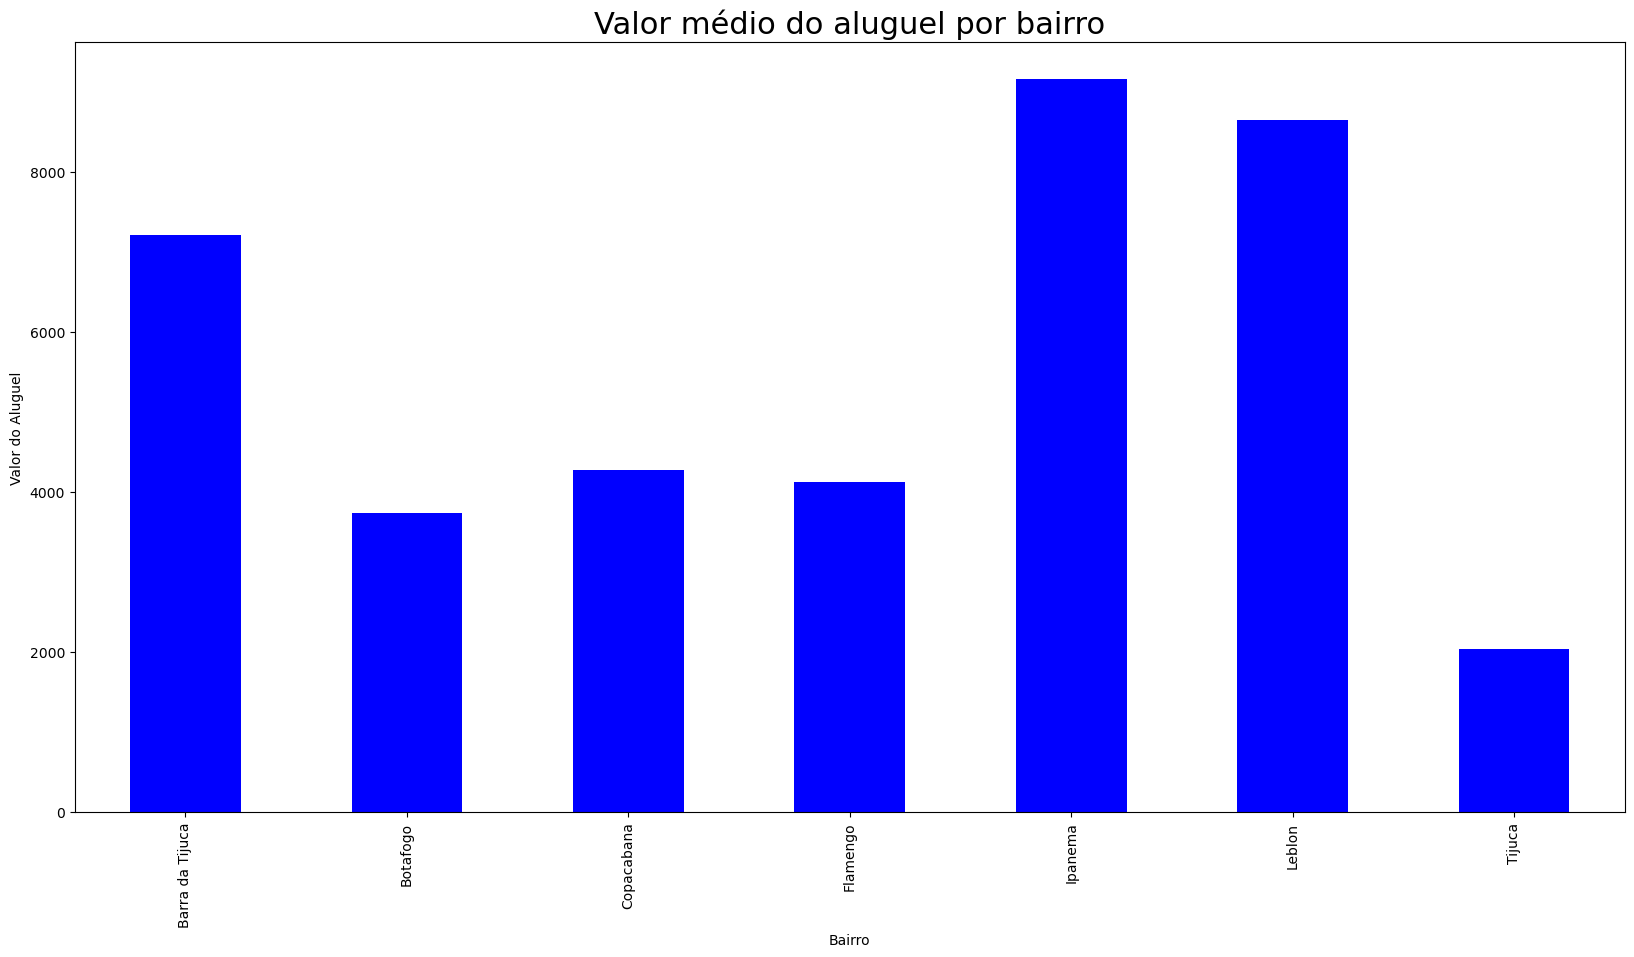

In [44]:
fig = grupo_bairro['Valor'].mean().plot.bar(color='blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor médio do aluguel por bairro', {'fontsize':22})

Text(0.5, 1.0, 'Valor médio do aluguel por bairro')

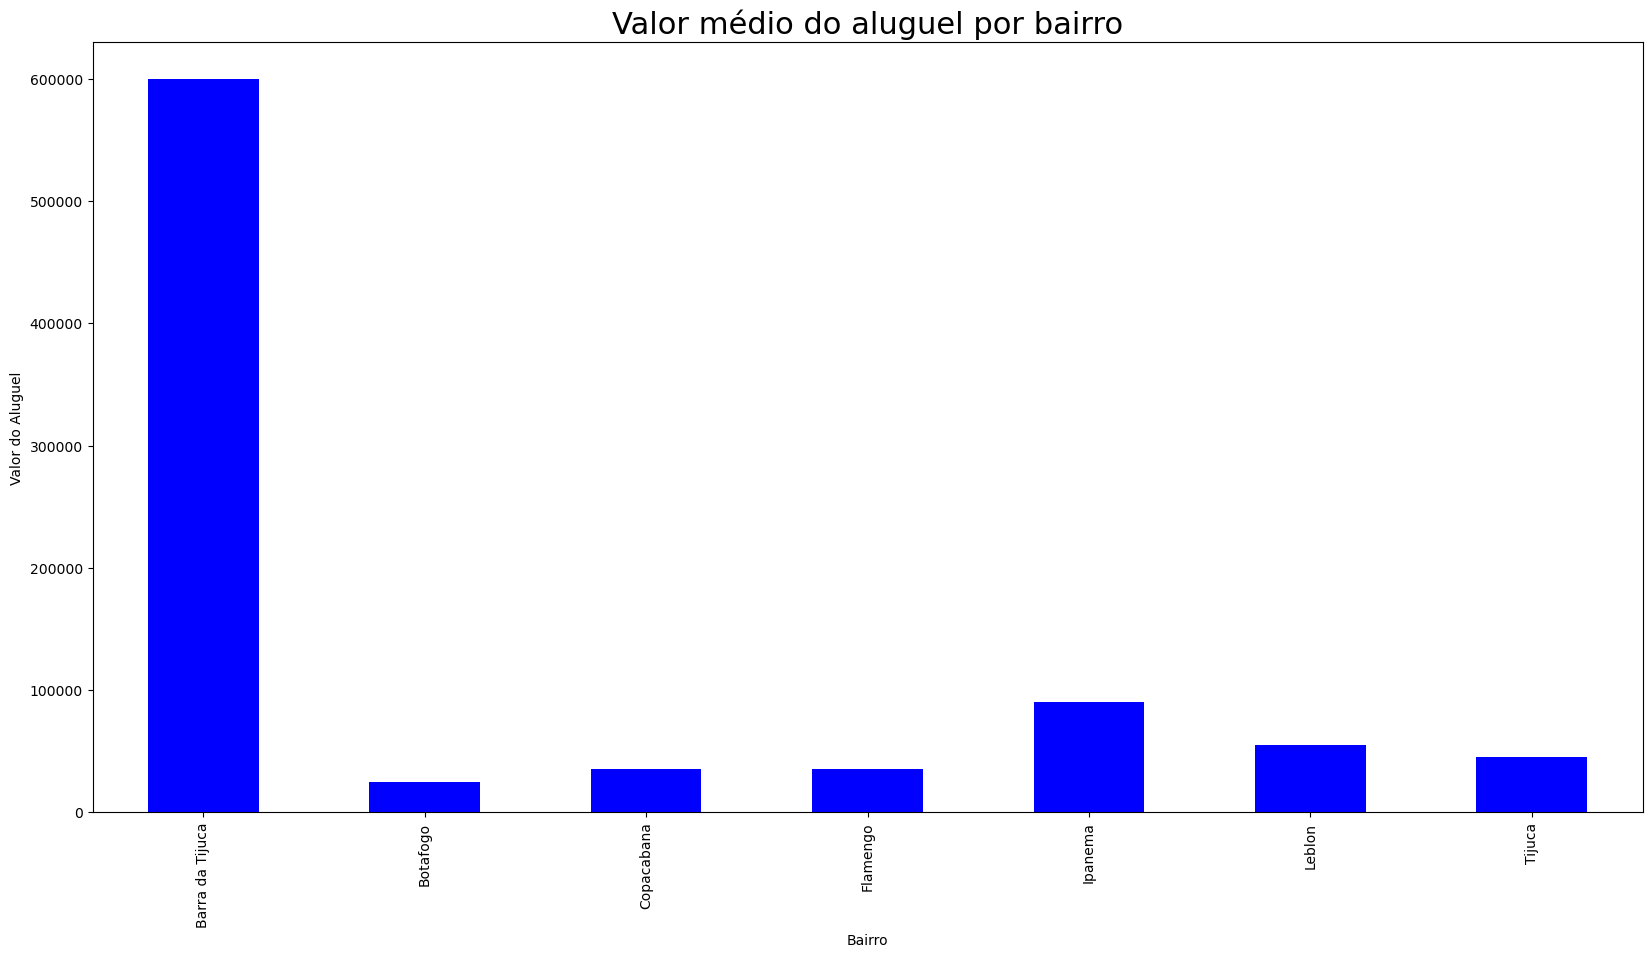

In [45]:
fig = grupo_bairro['Valor'].max().plot.bar(color='blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor médio do aluguel por bairro', {'fontsize':22})